In [1]:
import pandas as pd

# Load the dataset (replace the file path with your actual file)
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# View the first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [3]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# df['customerID'] = pd.to_numeric(df['customerID'], errors='coerce')
# df['gender'] = df['gender'].astype('string')
# Define a dictionary mapping columns to their target types
type_mapping = {
       'customerID': 'string',
       'gender': 'category',
       'Partner': 'category',
       'Dependents': 'category',
       'PhoneService': 'category',
       'MultipleLines': 'category',
       'InternetService': 'category',
       'OnlineSecurity': 'category',
       'OnlineBackup': 'category',
       'DeviceProtection': 'category',
       'TechSupport': 'category',
       'StreamingTV': 'category',
       'StreamingMovies': 'category',
       'PaperlessBilling': 'category',
       'PaymentMethod': 'category',
       'TotalCharges': 'float64',
       'Churn': 'category',
       'Contract':'string',
       'MonthlyCharges':'float64'
   }

   # Apply the type conversion
df = df.astype(type_mapping, errors='ignore')  # 'ignore' to skip errors
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   string  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   string  
 16  PaperlessBilling  7043 n

In [5]:
# One-Hot Encoding: This creates new columns for each category and assigns binary values
df = pd.get_dummies(df, columns=['gender',
       'Partner',
       'Dependents',
       'PhoneService',
       'MultipleLines',
       'InternetService',
       'OnlineSecurity',
       'OnlineBackup',
       'DeviceProtection',
       'TechSupport',
       'StreamingTV',
       'StreamingMovies',
       'PaperlessBilling',
       'PaymentMethod',
       'Churn'], drop_first=True)
df.head()

,customerID,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,0,1,Month-to-month,29.85,29.85,False,True,False,False,...,False,False,False,False,False,True,False,True,False,False
1,5575-GNVDE,0,34,One year,56.95,1889.50,True,False,False,True,...,False,False,False,False,False,False,False,False,True,False
2,3668-QPYBK,0,2,Month-to-month,53.85,108.15,True,False,False,True,...,False,False,False,False,False,True,False,False,True,True
3,7795-CFOCW,0,45,One year,42.30,1840.75,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,9237-HQITU,0,2,Month-to-month,70.70,151.65,False,False,False,True,...,False,False,False,False,False,True,False,True,False,True


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['tenure'].plot(kind='hist', bins=20, title='tenure')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['MonthlyCharges'].plot(kind='hist', bins=20, title='MonthlyCharges')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['TotalCharges'].plot(kind='hist', bins=20, title='TotalCharges')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('gender_Male').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Partner_Yes').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('PhoneService_Yes').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('MultipleLines_No phone service').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='index', y='tenure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='tenure', y='MonthlyCharges', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='MonthlyCharges', y='TotalCharges', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['tenure']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('gender_Male')):
  _plot_series(series, series_name, i)
  fig.legend(title='gender_Male', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('tenure')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['tenure']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Partner_Yes')):
  _plot_series(series, series_name, i)
  fig.legend(title='Partner_Yes', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('tenure')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['tenure']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('PhoneService_Yes')):
  _plot_series(series, series_name, i)
  fig.legend(title='PhoneService_Yes', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('tenure')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['tenure']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('MultipleLines_No phone service')):
  _plot_series(series, series_name, i)
  fig.legend(title='MultipleLines_No phone service', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('tenure')

from matplotlib import pyplot as plt
_df_15['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['tenure'].plot(kind='line', figsize=(8, 4), title='tenure')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['MonthlyCharges'].plot(kind='line', figsize=(8, 4), title='MonthlyCharges')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['TotalCharges'].plot(kind='line', figsize=(8, 4), title='TotalCharges')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Partner_Yes'].value_counts()
    for x_label, grp in _df_19.groupby('gender_Male')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('gender_Male')
_ = plt.ylabel('Partner_Yes')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['PhoneService_Yes'].value_counts()
    for x_label, grp in _df_20.groupby('Partner_Yes')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Partner_Yes')
_ = plt.ylabel('PhoneService_Yes')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['MultipleLines_No phone service'].value_counts()
    for x_label, grp in _df_21.groupby('PhoneService_Yes')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('PhoneService_Yes')
_ = plt.ylabel('MultipleLines_No phone service')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['InternetService_Fiber optic'].value_counts()
    for x_label, grp in _df_22.groupby('MultipleLines_No phone service')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('MultipleLines_No phone service')
_ = plt.ylabel('InternetService_Fiber optic')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['gender_Male'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='index', y='gender_Male', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['Partner_Yes'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='index', y='Partner_Yes', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['PhoneService_Yes'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='index', y='PhoneService_Yes', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['MultipleLines_No phone service'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='index', y='MultipleLines_No phone service', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

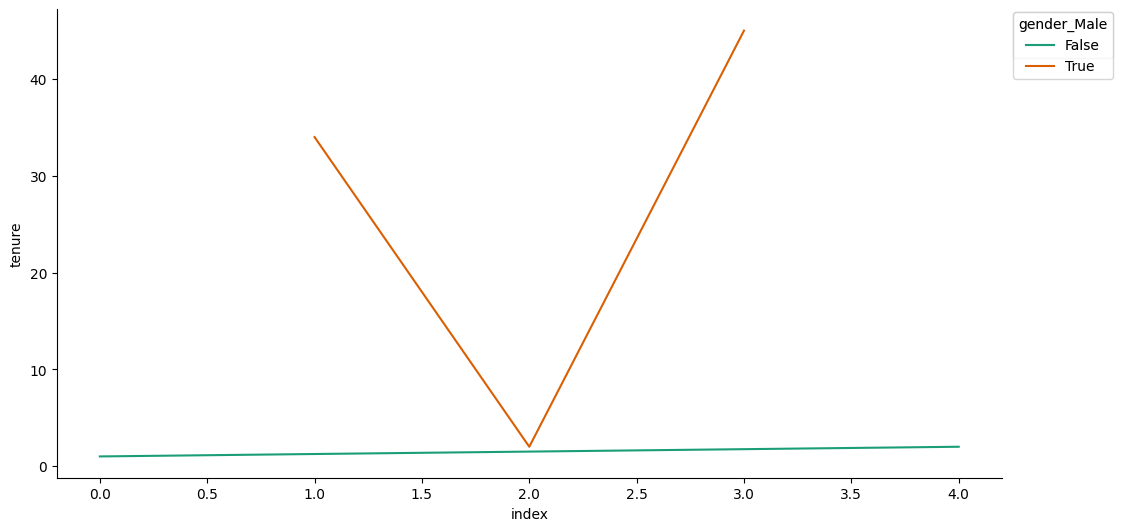

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['tenure']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('gender_Male')):
  _plot_series(series, series_name, i)
  fig.legend(title='gender_Male', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('tenure')

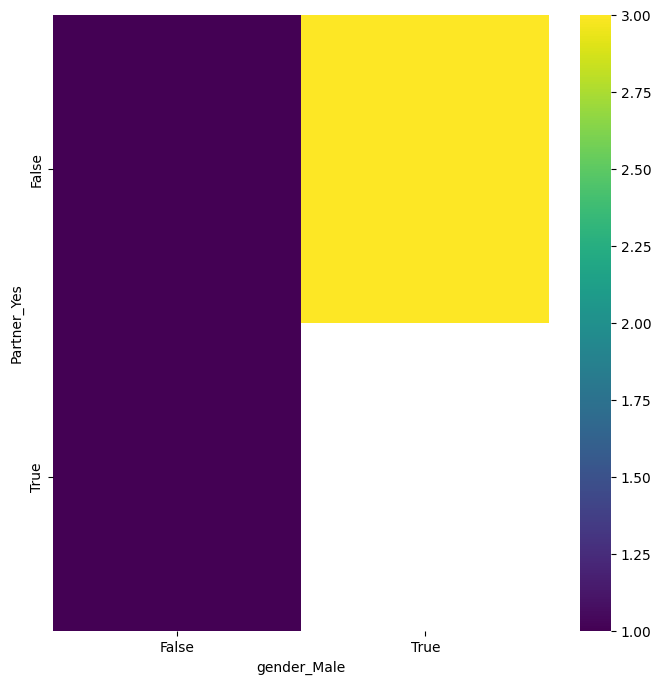

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Partner_Yes'].value_counts()
    for x_label, grp in _df_19.groupby('gender_Male')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('gender_Male')
_ = plt.ylabel('Partner_Yes')

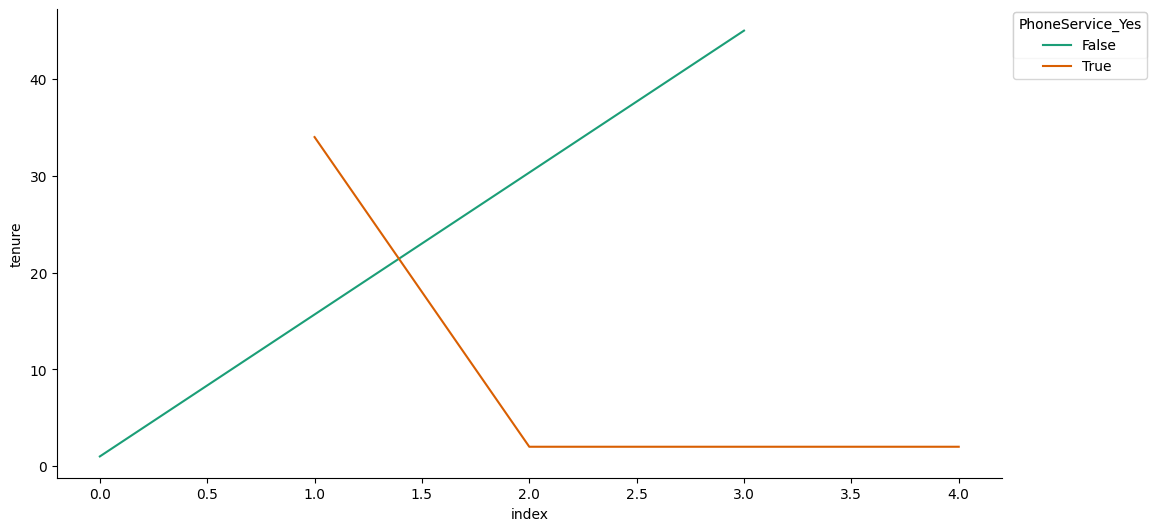

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['tenure']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('PhoneService_Yes')):
  _plot_series(series, series_name, i)
  fig.legend(title='PhoneService_Yes', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('tenure')

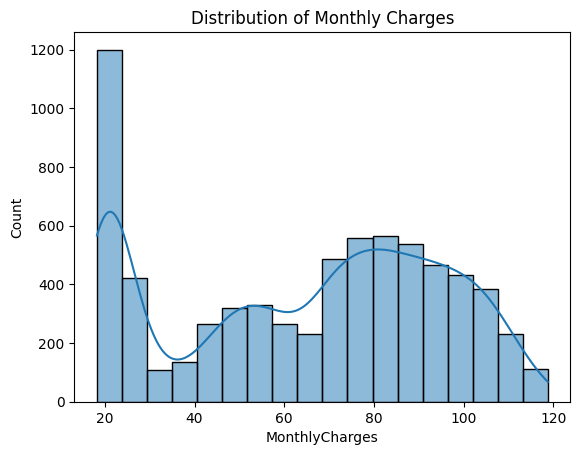

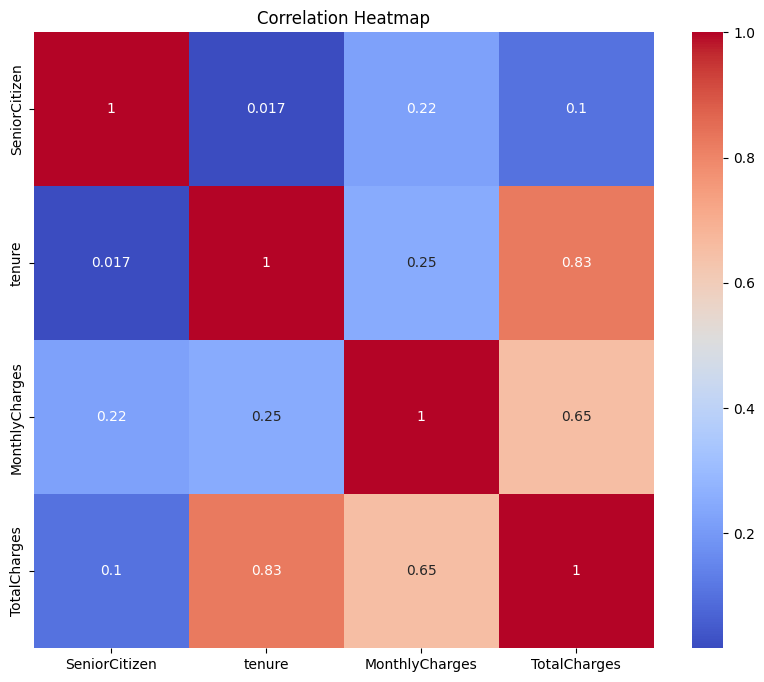

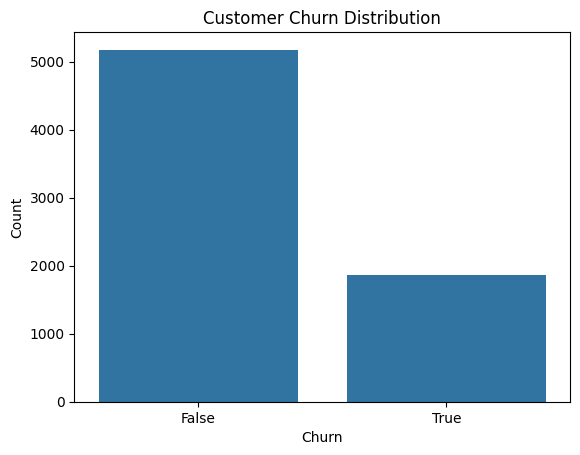

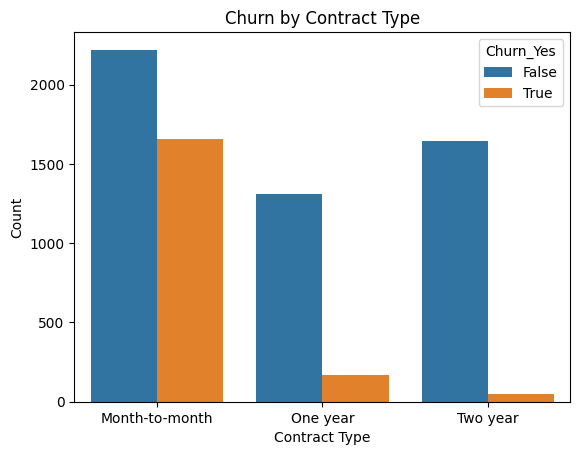

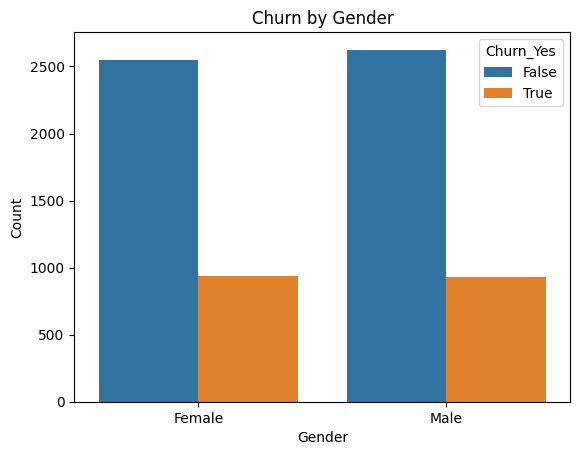

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'MonthlyCharges' is the 'Monthly Spend' column
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title('Distribution of Monthly Charges')
plt.show()

#correlation heatmap
numerical_df = df.select_dtypes(include=['number'])
corr = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Assuming 'Churn_Yes' represents churn status
# 1. Churn Distribution (Yes/No)
sns.countplot(x='Churn_Yes', data=df)
plt.title('Customer Churn Distribution')
plt.xlabel('Churn')  # More descriptive x-axis label
plt.ylabel('Count')
plt.show()

# 2. Churn by Contract Type (Assuming 'Contract' is the subscription type)
sns.countplot(x='Contract', hue='Churn_Yes', data=df)
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')  # More descriptive x-axis label
plt.ylabel('Count')
plt.show()

# 3. Churn by Gender (Assuming 'gender_Male' represents gender)
sns.countplot(x='gender_Male', hue='Churn_Yes', data=df)
plt.title('Churn by Gender')
plt.xlabel('Gender')  # More descriptive x-axis label
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'])  # Set x-axis tick labels
plt.show()


In [15]:
import pandas as pd

# Assuming your DataFrame is named 'df'

# Function to check if a column contains Yes/No or True/False
def has_yes_no_or_true_false(column):
    unique_values = column.unique()
    return any(value in [True, False] for value in unique_values)

# Get columns containing Yes/No or True/False
yes_no_columns = [col for col in df.columns if has_yes_no_or_true_false(df[col])]

# Print the columns
print(yes_no_columns)

['SeniorCitizen', 'tenure', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'Churn_Yes']


In [17]:
import pandas as pd

# Assuming your DataFrame is named 'df'

# For columns with True/False values (e.g., gender_Male)
boolean_columns = [['SeniorCitizen', 'tenure', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'Churn_Yes']]
for column in boolean_columns:
    df[column] = df[column].astype(int)
df.head()

,customerID,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,0,1,Month-to-month,29.85,29.85,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,0,34,One year,56.95,1889.50,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,3668-QPYBK,0,2,Month-to-month,53.85,108.15,1,0,0,1,...,0,0,0,0,0,1,0,0,1,1
3,7795-CFOCW,0,45,One year,42.30,1840.75,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,9237-HQITU,0,2,Month-to-month,70.70,151.65,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1


In [23]:
# 1. Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category','string']).columns

# 2. Drop categorical columns
df_dropped = df.drop(categorical_cols, axis=1)

# Display the DataFrame after dropping categorical columns
print(df_dropped)

      SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
0                 0       1           29.85         29.85            0   
1                 0      34           56.95       1889.50            1   
2                 0       2           53.85        108.15            1   
3                 0      45           42.30       1840.75            1   
4                 0       2           70.70        151.65            0   
...             ...     ...             ...           ...          ...   
7038              0      24           84.80       1990.50            1   
7039              0      72          103.20       7362.90            0   
7040              0      11           29.60        346.45            0   
7041              1       4           74.40        306.60            1   
7042              0      66          105.65       6844.50            1   

      Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0               1               0                 0   
1

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.67      0.46      0.55       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409



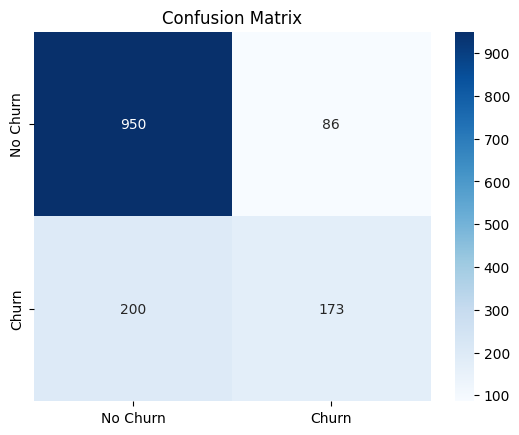

In [25]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.show()

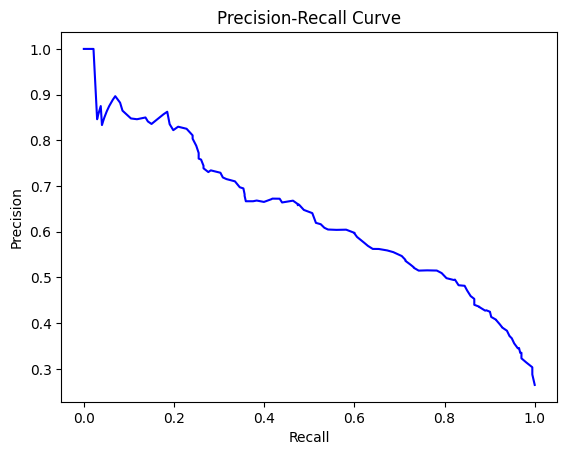

In [27]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get precision and recall values
precision, recall, thresholds = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])

# Plot Precision-Recall curve
plt.plot(recall, precision, color='b')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [26]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30]
}

# Grid Search for best parameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Use the best estimator for feature importance
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)  # Refit the best model

# Feature importance: Which features are most important for predicting churn?
feature_importances = best_model.feature_importances_

# Create a DataFrame to view feature importance
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort by importance
features_df = features_df.sort_values(by='Importance', ascending=False)
print(features_df)

Best parameters: {'max_depth': 10, 'n_estimators': 100}
Best cross-validation score: 0.8008519701810437
                                  Feature  Importance
1                                  tenure    0.201085
3                            TotalCharges    0.191371
2                          MonthlyCharges    0.129142
10            InternetService_Fiber optic    0.062870
26         PaymentMethod_Electronic check    0.058897
13                     OnlineSecurity_Yes    0.039032
19                        TechSupport_Yes    0.035773
24                   PaperlessBilling_Yes    0.024893
15                       OnlineBackup_Yes    0.019478
9                       MultipleLines_Yes    0.017107
5                             Partner_Yes    0.017058
4                             gender_Male    0.017008
6                          Dependents_Yes    0.016605
0                           SeniorCitizen    0.016534
17                   DeviceProtection_Yes    0.014052
14       OnlineBackup_No interne

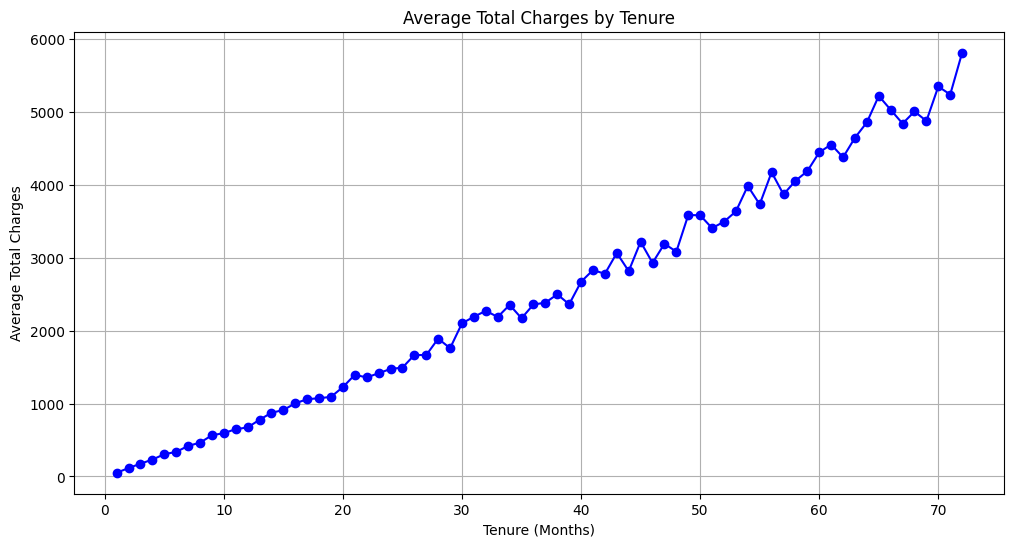

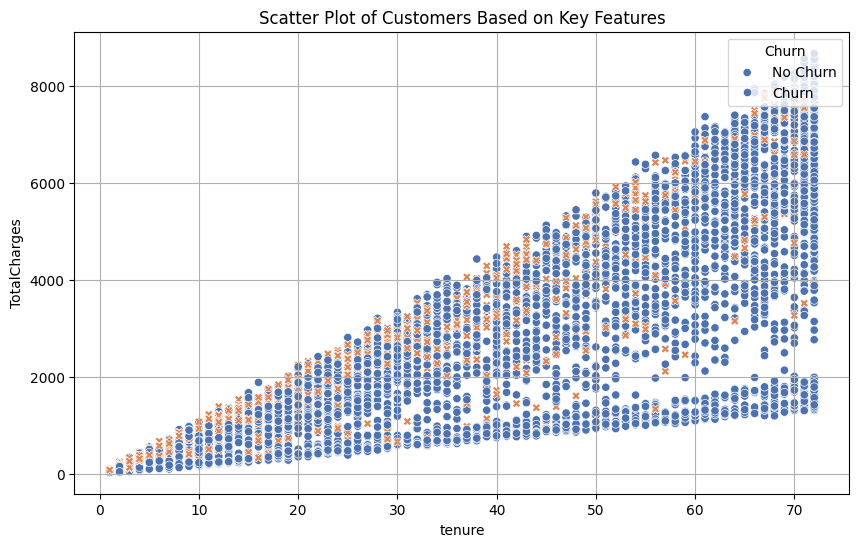

In [31]:
# Prepare the data for plotting
# Create a DataFrame with tenure and TotalCharges
line_data = X[['tenure', 'TotalCharges']].copy()
line_data['Churn_Yes'] = y

# Group by tenure to calculate average TotalCharges for each tenure
line_data_grouped = line_data.groupby('tenure').mean().reset_index()

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(line_data_grouped['tenure'], line_data_grouped['TotalCharges'], marker='o', linestyle='-', color='blue')

# Add titles and labels
plt.title('Average Total Charges by Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Average Total Charges')
plt.grid(True)

# Show the plot
plt.show()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'features_df' contains the feature importance DataFrame from your previous analysis

# Select the top 2 features based on importance
top_features = features_df.head(2)['Feature'].tolist()

# Prepare the data for plotting
plot_data = X[top_features].copy()
plot_data['Churn_Yes'] = y  # Add the target variable for coloring

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_data, x=top_features[0], y=top_features[1], hue='Churn_Yes', style='Churn_Yes', palette='deep', markers={0: 'o', 1: 'X'})

# Add titles and labels
plt.title('Scatter Plot of Customers Based on Key Features')
plt.xlabel(top_features[0])
plt.ylabel(top_features[1])
plt.legend(title='Churn', loc='upper right', labels=['No Churn', 'Churn'])
plt.grid(True)

# Show the plot
plt.show()